### Problem 1




##### 
1.1 Weight update equations for  Write the weight update equations for AdaGrad, RMSProp, RMSProp+Nesterov, AdaDelta, and Adam. Explain each term clearly. What are the hyper-parameters in each policy ? Explain how AdaDelta and Adam are different from RMSProp.


##### references:

1.https://medium.com/konvergen/modifying-adam-to-use-nesterov-accelerated-gradients-nesterov-accelerated-adaptive-moment-67154177e1fd

2.https://cs229.stanford.edu/proj2015/054_report.pdf

3.https://ruder.io/optimizing-gradient-descent/index.html#momentum

##### AdaGrad:

$$g_{t,i}=\triangledown_{\theta}\mathcal{L}(\theta_{t,i}), $$
where $g_{t,i}$ is the partial derivative of the objective function wrt to the parameter $\theta_{i}$  at time step t.  
For every paramter $\theta_{i}$ at each time t then becomes
$$\theta_{t+1,i} = \theta_{t,i} - \dfrac{\eta}{\sqrt{G_{t,ii} + \epsilon}}\cdot g_{t,i}$$
where $G_{t,ii}$ is a diagonal matrix where each diagonal element i is the sum of the squares of the gradients wrt $\theta_{i}$ up to time step t, and , while $\eta$ is a smoothing term that avoids division by zero (usually on the order of 1 e − 8 ).
Finally, we can vectorize the formula by performing a matrix-vector product $\odot$ between $G_{t}$ and $g_{t}$ since $G_{t}$ contains the sum of the squares of the past gradients wrt to all parameters $\theta$ along its diagonal:
$$\theta_{t+1} = \theta_{t} - \dfrac{\eta}{\sqrt{G_{t} + \epsilon}}\odot g_{t}.$$


RMSprop have been developed to resolve Adagrad's radically diminishing learning rates, where the accumulation of the squared gradients in the denominator will shrink as training continues.


##### RMSProp:

Instead of storing w previous squared gradients, the sum of gradients is recursively defined as a decaying average of all past squared gradients. Speccifically, 
$$ E[g^2]_t = 0.9 E[g^2]_{t-1} + 0.1 g^2_t, $$
where $E[g^2]_t$ depends only on 0.9 of average of past gradients and 0.1 of current ones.Similar to AdaGrad, RMSprop also devides the learning rate by an exponentially decaying average of squared gradients:
$$ \theta_{t+1} = \theta_{t} - \dfrac{\eta}{\sqrt{E[g^2]_t + \epsilon}} g_{t}. $$

##### RMSProp+Nesterov (Sutskever 2013):
Essentially we use RMSprop on the gradient part of the momentum, 
$$ m_{t}=\rho_{1}m_{t-1}+(1-\rho_{1})g_{t} \Rightarrow \hat{m_{t}}=\frac{m_{t}}{1-\rho^{t}_{1}}$$
$$ v_{t}=\rho_{2}v_{t-1}+(1-\rho_{1})g^{2}_{t} \Rightarrow \hat{v_{t}}=\frac{v_{t}}{1-\rho^{t}_{2}}$$
$$ \bar{m_{t}}=\rho_{1}\hat{m_{t}}+(1-\rho_{1})g_{t} $$
where $ \hat{m_{t}}$ and $\hat{v_{t}}$ are bias-corrected first and second moment estimates.
 $$\theta_{t+1} = \theta_{t} - \dfrac{\eta }{\sqrt{\hat{v}_t} + \epsilon}\bar{m_{t}}. $$

$m_{t}$ and $v_{t}$ are past squared gradients and past gradients for the momentum, and $\rho_1$ and $\rho_2$ are the decay rates.
#####  AdaDelta:
Starting from this of RMSProp, we have
$$ \Delta \theta_{t} = - \dfrac{\eta}{\sqrt{E[g^2]_t + \epsilon}} g_{t}=- \dfrac{\eta}{RMS[g]_{t}} g_{t}. $$
since the denominator of the first term is root mean squared (RMS) error criterion of the gradient.
The author further notes that the units in this update (as well as in SGD, Momentum, or Adagrad) do not match, i.e. the update should have the same hypothetical units as the parameter. Then rewrite the first equation of RMSProp for squared parameter updates: 

$$ E[\Delta \theta_{t}]_t = \gamma E[\Delta \theta_{t}]_{t-1} + (1-\gamma) \Delta \theta^{2}_{t}, $$
where $\gamma$ is the momentum term, and thus meaning 
$$ RMS[\Delta \theta_{t}]_{t} = \sqrt{E[\Delta \theta_{t}]_t + \epsilon}$$
Since $ RMS[\Delta \theta_{t}]_{t}$ is unknown, we can approximate it by replacing $\eta$ with $RMS[\Delta \theta_{t}]_{t-1}$ to obtain the Adadelta update rule:
$$ \Delta \theta_t = - \dfrac{RMS[\Delta \theta]_{t-1}}{RMS[g]_{t}} g_{t} $$
$$ \theta_{t+1} = \theta_t + \Delta \theta_t. $$

#####  Adam:

Similar to RMSProp with Nesterov (Dozat 2016):
$$ m_{t}=\rho_{1}m_{t-1}+(1-\rho_{1})g_{t} \Rightarrow \hat{m_{t}}=\frac{m_{t}}{1-\rho^{t}_{1}}$$
$$ v_{t}=\rho_{2}v_{t-1}+(1-\rho_{1})g^{2}_{t} \Rightarrow \hat{v_{t}}=\frac{v_{t}}{1-\rho^{t}_{2}}$$
where $ \hat{m_{t}}$ and $\hat{v_{t}}$ are bias-corrected first and second moment estimates.
 $$\theta_{t+1} = \theta_{t} - \dfrac{\eta }{\sqrt{\hat{v}_t} + \epsilon}\hat{m_{t}}. $$

$m_{t}$ and $v_{t}$ are past gradients and past squared gradients for the momentum, and $\rho_1$ and $\rho_2$ are the decay rates.

##### The hyperparameters:

AdaGrad: $\eta$,$\epsilon$

RMSProp: $\eta$,$\epsilon$

RMSProp+Nesterov: $\rho_1$, $\rho_2$,$\eta$, $\epsilon$ 

AdaDelta: $\gamma$

Adam: $\rho_1$, $\rho_2$,$\eta$, $\epsilon$


#####  How AdaDelta and Adam are different from RMSProp?

In addition to my answers above, there are two main technical differences:

1.Adadelta uses the root mean squared (RMS) of parameter updates in the numerator update rule

2.Adam, in addition, adds bias-correction and momentum to RMSprop

###### 1.2 

Train the neural network using all the five methods with L2-regularization for 200 epochs each and plot
the training loss vs number of epochs. Which method performs best (lowest training loss) ? 

##### reference: 

1. https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/

In [69]:
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adagrad,RMSprop,Nadam,Adadelta,Adam
from keras.models import Sequential
from keras.layers import Flatten,Dense,Dropout
import matplotlib.pyplot as plt
import keras.backend as K
import time

In [71]:
(trainX, trainY), (testX, testY) = cifar10.load_data()

# one hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)

# convert from integers to floats
trainX = trainX.astype('float32')
testX = testX.astype('float32')
# normalize to range 0-1
trainX = trainX / 255.0
testX = testX / 255.0

print('Train: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Test: X=%s, y=%s' % (testX.shape, testY.shape))

def base_model(optimizer, name):
    model = Sequential()
    model.add(Flatten())
    model.add(Dense(1000,activation='relu',kernel_regularizer='l2',kernel_initializer='he_uniform'))
    model.add(Dense(1000,activation='relu',kernel_regularizer='l2',kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    optimizer
    model.compile(loss='categorical_crossentropy', optimizer=name, metrics=['accuracy'])
    return model


Train: X=(50000, 32, 32, 3), y=(50000, 10)
Test: X=(10000, 32, 32, 3), y=(10000, 10)


In [72]:
model = base_model(optimizer=Adagrad(),name='Adagrad')
tic = time.time()
Adagrad_hist = model.fit(trainX, trainY, batch_size=128, epochs=200, validation_data=(testX,testY),shuffle=True,verbose=0)
toc = time.time()
print(toc-tic)

270.2905571460724


In [73]:
model = base_model(optimizer=RMSprop(),name='RMSProp')
tic = time.time()
RMSProp_hist = model.fit(trainX, trainY, batch_size=128, epochs=200, validation_data=(testX,testY),shuffle=True,verbose=0)
toc = time.time()
print(toc-tic)

344.08345580101013


In [74]:
model = base_model(optimizer=Nadam(),name='Nadam')
tic = time.time()
Nadam_hist = model.fit(trainX, trainY, batch_size=128, epochs=200, validation_data=(testX,testY),shuffle=True,verbose=0)
toc = time.time()
print(toc-tic)

457.9914360046387


In [75]:
model = base_model(optimizer=Nadam(),name='Adadelta')
tic = time.time()
Adadelta_hist = model.fit(trainX, trainY, batch_size=128, epochs=200, validation_data=(testX,testY),shuffle=True,verbose=0)
toc = time.time()
print(toc-tic)

299.5380964279175


In [76]:
model = base_model(optimizer=Adam(),name='Adam')
tic = time.time()
Adam_hist = model.fit(trainX, trainY, batch_size=128, epochs=200, validation_data=(testX,testY),shuffle=True,verbose=0)
toc = time.time()
print(toc-tic)

273.76620411872864


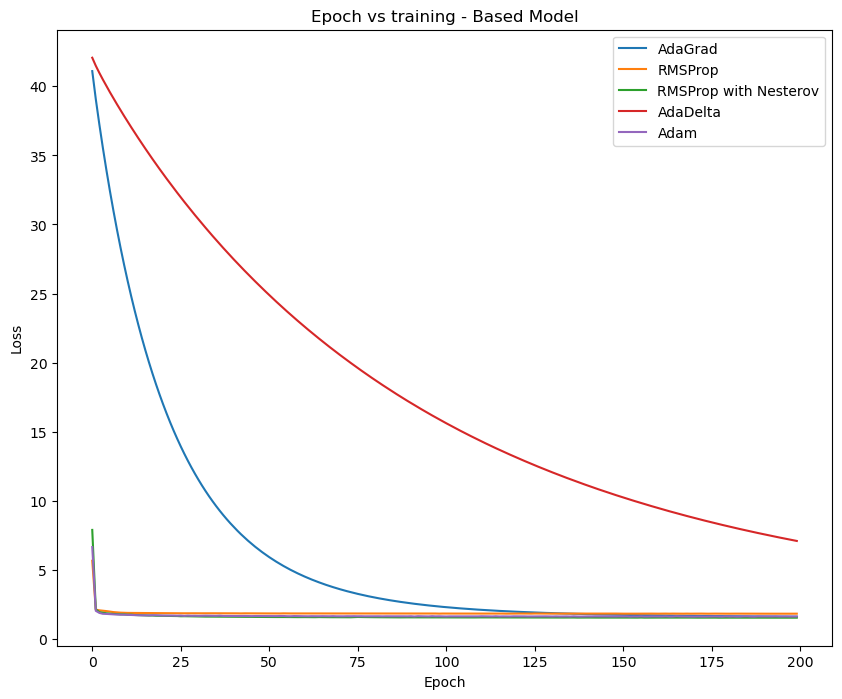

In [77]:
fig = plt.figure(figsize=(10,8))
plt.plot(Adagrad_hist.history['loss'],label='AdaGrad')
plt.plot(RMSProp_hist.history['loss'],label='RMSProp')
plt.plot(Nadam_hist.history['loss'],label='RMSProp with Nesterov')
plt.plot(Adadelta_hist.history['loss'],label='AdaDelta')
plt.plot(Adam_hist.history['loss'],label='Adam')
plt.title('Epoch vs training - Based Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [78]:
Traing_loss=[Adagrad_hist.history['loss'][-1]
,RMSProp_hist.history['loss'][-1]
,Nadam_hist.history['loss'][-1]
,Adadelta_hist.history['loss'][-1]
,Adam_hist.history['loss'][-1]]

In [93]:
Traing_loss

[1.621887445449829,
 1.8416709899902344,
 1.5519005060195923,
 7.103944301605225,
 1.6383757591247559]

##### 
From the graph and number above, we can see that after 200 epoch, RMSProp with Nesterov (1.5519005060195923) has the lowest training loss among all five methods, Adagrad second(1.621887445449829),and Adam third (1.6383757591247559).

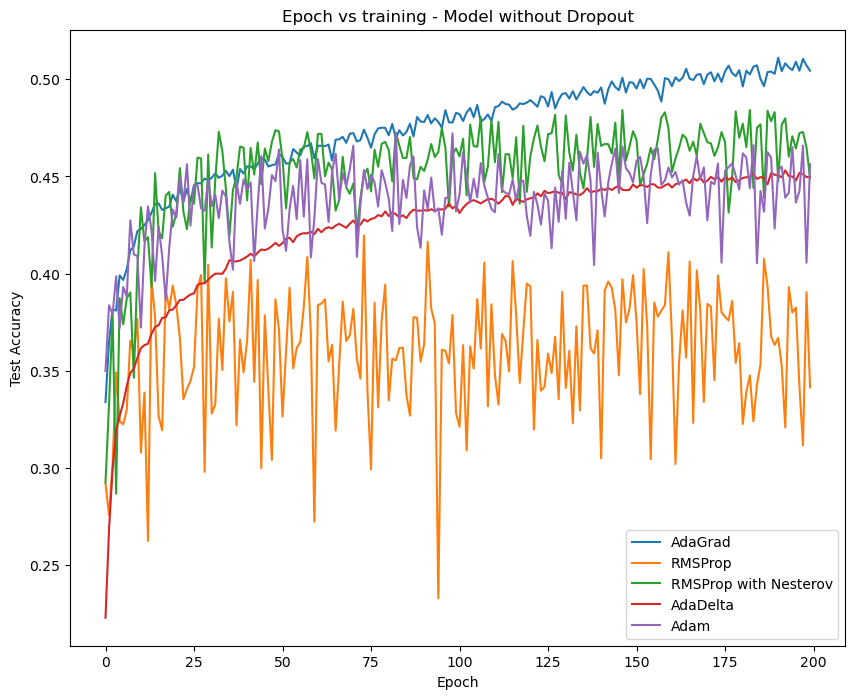

In [79]:
fig = plt.figure(figsize=(10,8))
plt.plot(Adagrad_hist.history['val_accuracy'],label='AdaGrad')
plt.plot(RMSProp_hist.history['val_accuracy'],label='RMSProp')
plt.plot(Nadam_hist.history['val_accuracy'],label='RMSProp with Nesterov')
plt.plot(Adadelta_hist.history['val_accuracy'],label='AdaDelta')
plt.plot(Adam_hist.history['val_accuracy'],label='Adam')
plt.title('Epoch vs training - Model without Dropout')
plt.ylabel('Test Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [80]:
Test_Accuracy=[Adagrad_hist.history['val_accuracy'][-1]
,RMSProp_hist.history['val_accuracy'][-1]
,Nadam_hist.history['val_accuracy'][-1]
,Adadelta_hist.history['val_accuracy'][-1]
,Adam_hist.history['val_accuracy'][-1]]

#### 1.3 With drouout weight scaling at test time using keras

##### references:

1. https://github.com/keras-team/keras/issues/9412
2. http://home.mit.bme.hu/~hadhazi/Oktatas/NN18/dem3/html_demo/CIFAR-10Demo.html

In [81]:
def dropout_model(optimizer, name):
    model = Sequential()
    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(1000,activation='relu',kernel_regularizer='l2',kernel_initializer='he_uniform'))
    model.add(Dropout(0.5))
    model.add(Dense(1000,activation='relu',kernel_regularizer='l2',kernel_initializer='he_uniform'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    optimizer
    model.compile(loss='categorical_crossentropy', optimizer=name, metrics=['accuracy'])
    return model    

In [82]:
model = dropout_model(optimizer=Adagrad(),name='Adagrad')
tic = time.time()
Adagrad_hist = model.fit(trainX, trainY, batch_size=128, epochs=200, validation_data=(testX,testY),shuffle=True,verbose=0)
toc = time.time()
print(toc-tic)

279.72138381004333


In [83]:
model = dropout_model(optimizer=RMSprop(),name='RMSProp')
tic = time.time()
RMSProp_hist = model.fit(trainX, trainY, batch_size=128, epochs=200, validation_data=(testX,testY),shuffle=True,verbose=0)
toc = time.time()
print(toc-tic)

353.5513780117035


In [84]:
model = dropout_model(optimizer=Nadam(),name='Nadam')
tic = time.time()
Nadam_hist = model.fit(trainX, trainY, batch_size=128, epochs=200, validation_data=(testX,testY),shuffle=True,verbose=0)
toc = time.time()
print(toc-tic)

472.6236095428467


In [85]:
model = dropout_model(optimizer=Nadam(),name='Adadelta')
tic = time.time()
Adadelta_hist = model.fit(trainX, trainY, batch_size=128, epochs=200, validation_data=(testX,testY),shuffle=True,verbose=0)
toc = time.time()
print(toc-tic)

307.72168707847595


In [86]:
model = dropout_model(optimizer=Adam(),name='Adam')
tic = time.time()
Adam_hist = model.fit(trainX, trainY, batch_size=128, epochs=200, validation_data=(testX,testY),shuffle=True,verbose=0)
toc = time.time()
print(toc-tic)

282.2515456676483


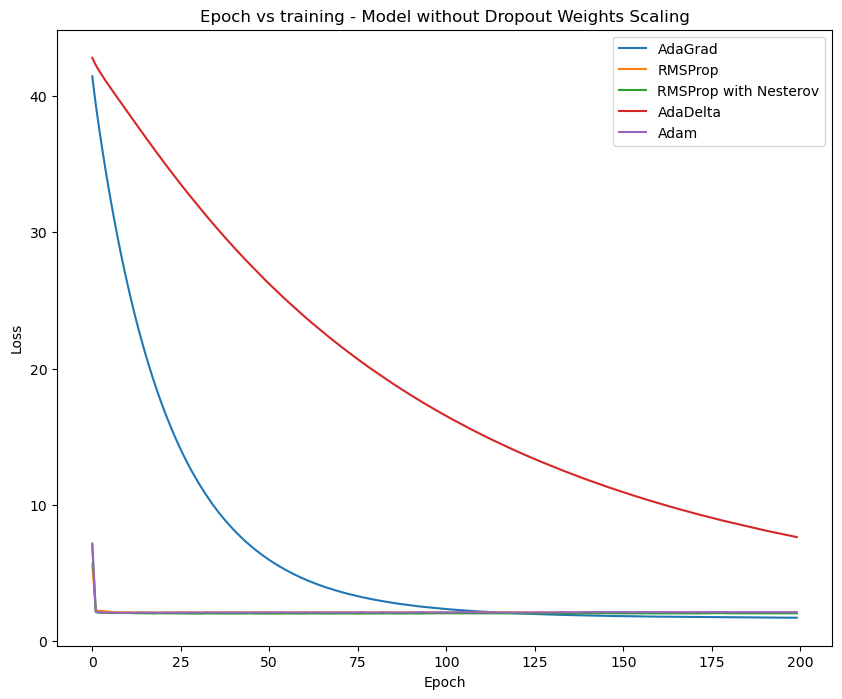

In [87]:
fig = plt.figure(figsize=(10,8))
plt.plot(Adagrad_hist.history['loss'],label='AdaGrad')
plt.plot(RMSProp_hist.history['loss'],label='RMSProp')
plt.plot(Nadam_hist.history['loss'],label='RMSProp with Nesterov')
plt.plot(Adadelta_hist.history['loss'],label='AdaDelta')
plt.plot(Adam_hist.history['loss'],label='Adam')
plt.title('Epoch vs training - Model without Dropout Weights Scaling')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [88]:
Traing_loss_1=[Adagrad_hist.history['loss'][-1]
,RMSProp_hist.history['loss'][-1]
,Nadam_hist.history['loss'][-1]
,Adadelta_hist.history['loss'][-1]
,Adam_hist.history['loss'][-1]]

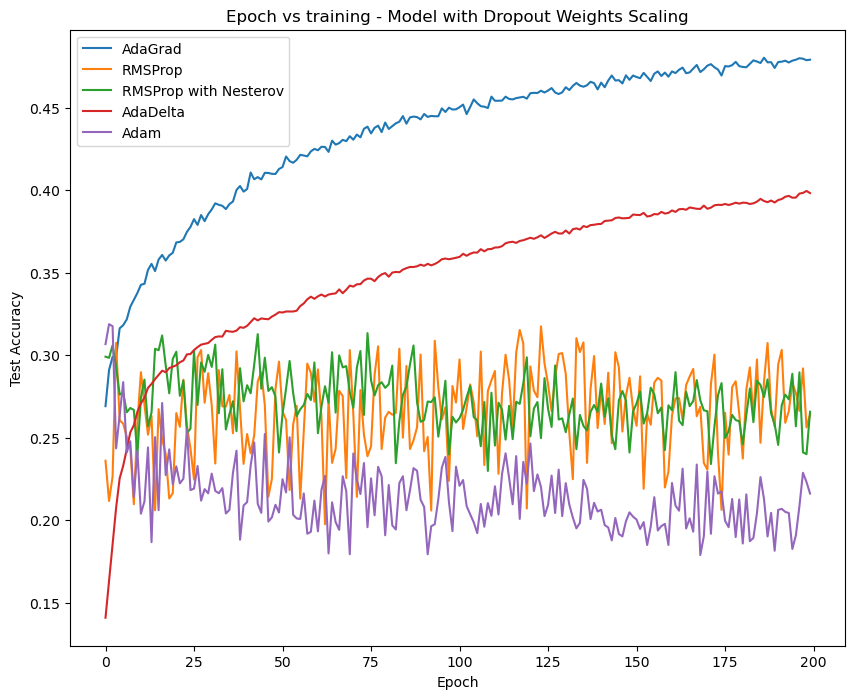

In [89]:
fig = plt.figure(figsize=(10,8))
plt.plot(Adagrad_hist.history['val_accuracy'],label='AdaGrad')
plt.plot(RMSProp_hist.history['val_accuracy'],label='RMSProp')
plt.plot(Nadam_hist.history['val_accuracy'],label='RMSProp with Nesterov')
plt.plot(Adadelta_hist.history['val_accuracy'],label='AdaDelta')
plt.plot(Adam_hist.history['val_accuracy'],label='Adam')
plt.title('Epoch vs training - Model with Dropout Weights Scaling')
plt.ylabel('Test Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [90]:
Test_Accuracy_1=[Adagrad_hist.history['val_accuracy'][-1]
,RMSProp_hist.history['val_accuracy'][-1]
,Nadam_hist.history['val_accuracy'][-1]
,Adadelta_hist.history['val_accuracy'][-1]
,Adam_hist.history['val_accuracy'][-1]]

In [94]:
Traing_loss_1

[1.7349627017974854,
 2.1224074363708496,
 2.0573651790618896,
 7.649022102355957,
 2.1436104774475098]

##### 

From the number above, we can see that the training loss overall are higher than that of the based model without dropout.Moreover,amoung the five methods, Adagrad has the lowest traning loss (1.7349627017974854).

##### 
For the five methods, compare their training time (to finish 200 epochs
with dropout) to the training time in part 2 (to finish 200 epochs without dropout).

Based_model:

Adagrad	RMSProp	Nadam	Adadelta	Adam

270.2905571	344.0834558	457.991436	299.5380964	273.7662041


Model_with dropout:

Adagrad	RMSProp	Nadam	Adadelta	Adam

279.7213838	353.551378	472.6236095	307.7216871	282.2515457


The model with dropout takes 9 more seconds on average than the model without using dropout for each method.

##### 1.4 

Compare test accuracy of trained model for all the five methods from part 2 and part 3. Note that to
calculate test accuracy of model trained using dropout you need to appropriately scale the weights (by
the dropout probability).

According to the reference and a few other posts, dropout should be applied during training (drop inputs with probability p) but there also needs to be a corresponding component of scaling the weights at test time as outlined in Srivastava et al.(2014). See [1] .

New verseions of Keras has implemented an inverse scaling [4] automatically during training to account for this matter, thus, we do not need to manually scale the weights anymore.See [2][3].  

Overall, the testing accuracy are higher for based model without dropout.


##### 1. The test accuracy for the base model without dropout:

In [91]:
Test_Accuracy

[0.5044000148773193,
 0.34150001406669617,
 0.44909998774528503,
 0.4496999979019165,
 0.4562999904155731]

##### 2. The test accuracy for the base model with dropout:

In [92]:
Test_Accuracy_1

[0.47920000553131104,
 0.26409998536109924,
 0.26570001244544983,
 0.3982999920845032,
 0.21610000729560852]

Based on the comparision above, we can see that test accuracy are higher for the based model acorss all methods.

##### references:

1. http://home.mit.bme.hu/~hadhazi/Oktatas/NN18/dem3/html_demo/CIFAR-10Demo.html
2. https://github.com/keras-team/keras/issues/5357
3. http://www.cs.toronto.edu/~rsalakhu/papers/srivastava14a.pdf
4. https://cs231n.github.io/neural-networks-2/

### Question 2

##### Source code:  https://www.pyimagesearch.com/2019/08/05/keraslearning-rate-finder/.
##### Other references:
1. https://pyimagesearch.com/2019/07/29/cyclical-learning-rates-with-keras-and-deep-learning/

In [10]:
from minigooglenet import MiniGoogLeNet
from tensorflow.keras.datasets import fashion_mnist
from learningratefinder import LearningRateFinder
# import config_hw3
from clr_callback import CyclicLR 
import warnings
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import sys

warnings.filterwarnings("ignore")


In [13]:
ap = argparse.ArgumentParser()
ap.add_argument("-f", "--lr-find", type=int, default=0, help="whether or not to find optimal learning rate")
args = vars(ap.parse_args())

usage: ipykernel_launcher.py [-h] [-f LR_FIND]
ipykernel_launcher.py: error: argument -f/--lr-find: invalid int value: '/home/gm3044/.local/share/jupyter/runtime/kernel-7ed32acd-9875-48ac-8acd-207cdcc6563f.json'
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/argparse.py", line 2409, in _get_value
    result = type_func(arg_string)
ValueError: invalid literal for int() with base 10: '/home/gm3044/.local/share/jupyter/runtime/kernel-7ed32acd-9875-48ac-8acd-207cdcc6563f.json'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/argparse.py", line 1787, in parse_known_args
    namespace, args = self._parse_known_args(args, namespace)
  File "/opt/conda/lib/python3.7/argparse.py", line 1993, in _parse_known_args
    start_index = consume_optional(start_index)
  File "/opt/conda/lib/python3.7/argparse.py", line 1933, in consume_optional
    take_action(action, args, option_string)
  File "/opt/conda/lib/python3.7/argparse.py", line 1845, in take_action
    argument_values = self._get_values(action, argument_strings)
  File "/opt/conda/lib/python3.7/argparse.py", line 2376, in _get_values
    val

TypeError: object of type 'NoneType' has no len()

In [14]:
((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()
trainX = np.array([cv2.resize(x, (32, 32)) for x in trainX])
testX = np.array([cv2.resize(x, (32, 32)) for x in testX])
trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0
trainX = trainX.reshape((trainX.shape[0], 32, 32, 1))
testX = testX.reshape((testX.shape[0], 32, 32, 1))

lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

aug = ImageDataGenerator(width_shift_range=0.1,
	height_shift_range=0.1, horizontal_flip=True,
	fill_mode="nearest")

4422102/4422102 [==============================] - 0s 0us/step


157/157 [==============================] - 2s 11ms/step
              precision    recall  f1-score   support

         top       0.00      0.00      0.00      1000
     trouser       0.00      0.00      0.00      1000
    pullover       0.00      0.00      0.00      1000
       dress       0.00      0.00      0.00      1000
        coat       0.00      0.00      0.00      1000
      sandal       0.00      0.00      0.00      1000
       shirt       0.00      0.00      0.00      1000
     sneaker       0.10      1.00      0.18      1000
         bag       0.00      0.00      0.00      1000
  ankle boot       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000

Epoch 1/3
938/938 [==============================] - 36s 38ms/step - loss: 4.2051 - accuracy: 0.1000
Epoch 2/3
938/938 [==============================] - 36s 38ms/step - loss: 4.1832 - 

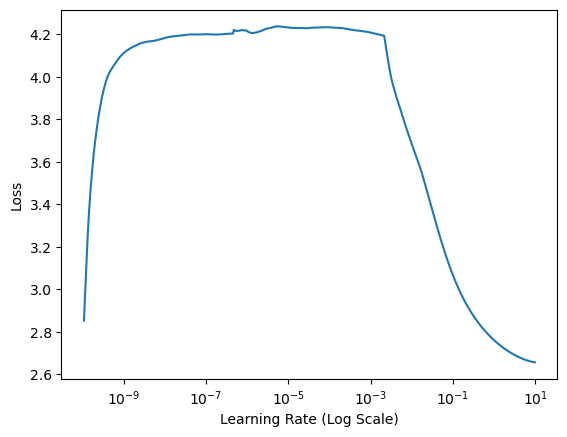

In [49]:
CLASSES = ["top", "trouser", "pullover", "dress", "coat",
           "sandal", "shirt", "sneaker", "bag", "ankle boot"]
CLR_METHOD = "triangular"
MIN_LR = 1e-10
MAX_LR = 10
BATCH_SIZE = 64
STEP_SIZE = 8
NUM_EPOCHS = 5

model = MiniGoogLeNet.build(width=32, height=32, depth=1, classes=10)
model.compile(loss="categorical_crossentropy", optimizer=SGD(lr=MIN_LR, momentum=0.9),
	metrics=["accuracy"])

clr = CyclicLR(
	mode=CLR_METHOD,
	base_lr=MIN_LR,
	max_lr=MAX_LR,
	step_size=10)


H = model.fit(
	x=aug.flow(trainX, trainY, batch_size=BATCH_SIZE),
	validation_data=(testX, testY),
	steps_per_epoch=trainX.shape[0] // BATCH_SIZE,
	epochs=NUM_EPOCHS,
	callbacks=[clr],
	verbose=0)

predictions = model.predict(x=testX, batch_size=BATCH_SIZE)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=CLASSES))


lrf = LearningRateFinder(model)
lrf.find(
		aug.flow(trainX, trainY, batch_size=BATCH_SIZE),
		MIN_LR, MAX_LR,
		stepsPerEpoch=np.ceil((len(trainX) / float(BATCH_SIZE))),
		batchSize=BATCH_SIZE)

lrf.plot_loss()

#####  2.1
Using the insides from the reference, we know that 

At approximately 1e-3 our loss starts to decrease, meaning that our learning rate is just large enough that the model can start to learn.
By 1e-1 loss is dropping rapidly, indicating that this is a “sweet spot” where the network can learn quickly. 
At around 1, I see the learning rate have appeared a tendency to increase. 

Overall, I would set lr_min and lr_max to be 10-3 and 1, respectively.



##### 2.2

In [60]:
MIN_LR = 1e-3
MAX_LR = 1
NUM_EPOCHS = 15
CLR_METHOD = "exp_range"


model = MiniGoogLeNet.build(width=32, height=32, depth=1, classes=10)
model.compile(loss="categorical_crossentropy", optimizer=SGD(lr=MIN_LR, momentum=0.9),
	metrics=["accuracy"])

stepSize = STEP_SIZE * (trainX.shape[0] // BATCH_SIZE)
clr = CyclicLR(
	mode=CLR_METHOD,
	base_lr=MIN_LR,
	max_lr=MAX_LR,
	step_size=stepSize)

H = model.fit(
	x=aug.flow(trainX, trainY, batch_size=BATCH_SIZE),
	validation_data=(testX, testY),
	steps_per_epoch=trainX.shape[0] // BATCH_SIZE,
	epochs=NUM_EPOCHS,
	callbacks=[clr],
	verbose=1)

predictions = model.predict(x=testX, batch_size=BATCH_SIZE)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=CLASSES))

Epoch 1/15
  5/937 [..............................] - ETA: 54s - loss: 2.5183 - accuracy: 0.1125WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0238s vs `on_train_batch_end` time: 0.0313s). Check your callbacks.


937/937 [==============================] - 43s 43ms/step - loss: 0.6677 - accuracy: 0.7555 - val_loss: 0.8070 - val_accuracy: 0.7276
Epoch 2/15
937/937 [==============================] - 40s 43ms/step - loss: 0.4056 - accuracy: 0.8540 - val_loss: 1.0360 - val_accuracy: 0.7117
Epoch 3/15
937/937 [==============================] - 40s 43ms/step - loss: 0.3511 - accuracy: 0.8742 - val_loss: 0.4881 - val_accuracy: 0.8453
Epoch 4/15
937/937 [==============================] - 40s 43ms/step - loss: 0.3262 - accuracy: 0.8838 - val_loss: 0.8741 - val_accuracy: 0.7333
Epoch 5/15
937/937 [==============================] - 40s 43ms/step - loss: 0.3148 - accuracy: 0.8898 - val_loss: 0.5045 - val_accuracy: 0.8517
Epoch 6/15
937/937 [==============================] - 40s 43ms/step - loss: 0.3082 - accuracy: 0.8925 - val_loss: 0.4909 - val_accuracy: 0.8321
Epoch 7/15
937/937 [==============================] - 40s 43ms/step - loss: 0.2981 - accuracy: 0.8945 - val_loss: 0.3077 - val_accuracy: 0.8961
Epo

Text(0, 0.5, 'Learning Rate')

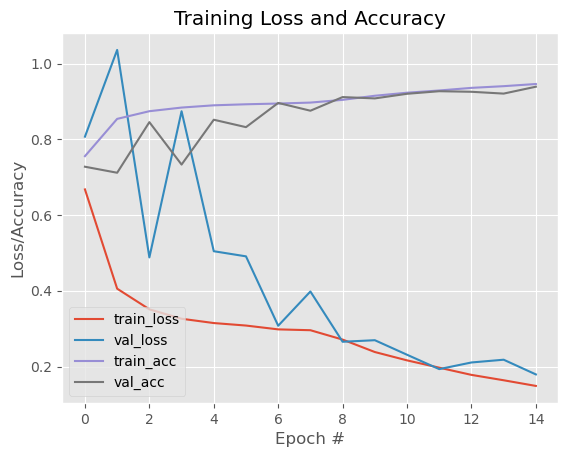

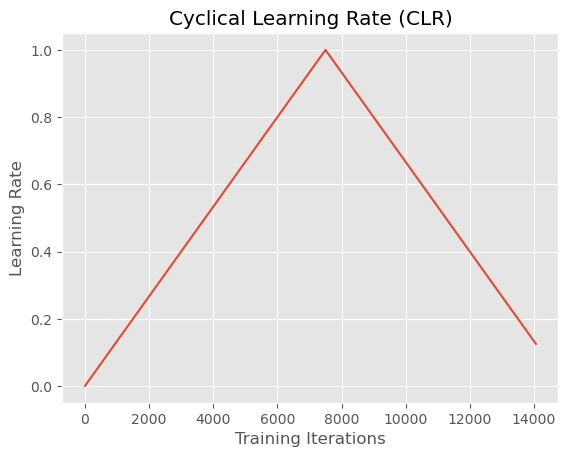

In [61]:
N = np.arange(0, NUM_EPOCHS)

plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

# plot the learning rate history

N = np.arange(0, len(clr.history["lr"]))
plt.figure()
plt.plot(N, clr.history["lr"])
plt.title("Cyclical Learning Rate (CLR)")
plt.xlabel("Training Iterations")
plt.ylabel("Learning Rate")

##### 2.3

In 2.3, I fixed the learning rate to be l_max and then run models from 32 to 16384 batchsize.
Specifcally, I attemtped fix the total number of iteration. For exmaple, when batch size is 32, I use 1 epoch only then the total ilteration is 1875, then when I increased the batch size to 128 from 32(4x), I increase the epoch from 1 to 4, and so forth.

I fixed the epoch to be 48 for 8192 and 16384 otherwise it took too long to finish running the program even with gcp.

Moreover, when batch size is 8192 and 16385, I used an effective batch size approach discussed in the reference, where I increase the steps 8 time while effectively decreases the epoch size 8 times.

##### reference:
1. https://medium.com/@davidlmorton/increasing-mini-batch-size-without-increasing-memory-6794e10db672

In [61]:
MIN_LR = 1
MAX_LR = 1
CLR_METHOD = "exp_range"
batch_size = [32,128,512,2048,8192,16384]
loss = []
CLASSES = ["top", "trouser", "pullover", "dress", "coat",
	"sandal", "shirt", "sneaker", "bag", "ankle boot"]

In [62]:
model = MiniGoogLeNet.build(width=32, height=32, depth=1, classes=10)
model.compile(loss="categorical_crossentropy", optimizer=SGD(lr=MIN_LR, momentum=0.9),
	metrics=["accuracy"])

i = batch_size[0]
NUM_EPOCHS = 1   

stepSize = STEP_SIZE * (trainX.shape[0] // i)
clr = CyclicLR(
    mode=CLR_METHOD,
    base_lr=MIN_LR,
    max_lr=MAX_LR,
    step_size=stepSize)
print('The current batch size is :',i)

H_0 = model.fit(
    x=aug.flow(trainX, trainY, batch_size=i),
    validation_data=(testX, testY),
    steps_per_epoch=trainX.shape[0] // i,
    epochs=NUM_EPOCHS,
    callbacks=[clr],
    verbose=1)

predictions = model.predict(x=testX, batch_size=i)
print(classification_report(testY.argmax(axis=1),
    predictions.argmax(axis=1), target_names=CLASSES))
loss.append(H_0.history["loss"][-1])

The current batch size is : 32
   5/1875 [..............................] - ETA: 1:04 - loss: 6.7603 - accuracy: 0.1063WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0168s vs `on_train_batch_end` time: 0.0170s). Check your callbacks.


313/313 [==============================] - 2s 6ms/step
              precision    recall  f1-score   support

         top       0.20      0.89      0.32      1000
     trouser       0.51      0.92      0.66      1000
    pullover       0.00      0.00      0.00      1000
       dress       0.00      0.00      0.00      1000
        coat       0.00      0.00      0.00      1000
      sandal       1.00      0.02      0.04      1000
       shirt       0.00      0.00      0.00      1000
     sneaker       0.07      0.01      0.02      1000
         bag       0.97      0.12      0.21      1000
  ankle boot       0.30      1.00      0.46      1000

    accuracy                           0.30     10000
   macro avg       0.30      0.30      0.17     10000
weighted avg       0.30      0.30      0.17     10000



In [63]:
model = MiniGoogLeNet.build(width=32, height=32, depth=1, classes=10)
model.compile(loss="categorical_crossentropy", optimizer=SGD(lr=MIN_LR, momentum=0.9),
	metrics=["accuracy"])

i = batch_size[1]
NUM_EPOCHS = 4   

stepSize = STEP_SIZE * (trainX.shape[0] // i)
clr = CyclicLR(
    mode=CLR_METHOD,
    base_lr=MIN_LR,
    max_lr=MAX_LR,
    step_size=stepSize)
print('The current batch size is :',i)

H_1 = model.fit(
    x=aug.flow(trainX, trainY, batch_size=i),
    validation_data=(testX, testY),
    steps_per_epoch=trainX.shape[0] // i,
    epochs=NUM_EPOCHS,
    callbacks=[clr],
    verbose=1)

predictions = model.predict(x=testX, batch_size=i)
print(classification_report(testY.argmax(axis=1),
    predictions.argmax(axis=1), target_names=CLASSES))
loss.append(H_1.history["loss"][-1])

The current batch size is : 128
Epoch 1/4
  6/468 [..............................] - ETA: 37s - loss: 6.7803 - accuracy: 0.1536WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0317s vs `on_train_batch_end` time: 0.0532s). Check your callbacks.


468/468 [==============================] - 41s 84ms/step - loss: 1.1912 - accuracy: 0.5598 - val_loss: 1.6473 - val_accuracy: 0.5990
Epoch 2/4
468/468 [==============================] - 38s 82ms/step - loss: 0.6390 - accuracy: 0.7600 - val_loss: 0.8954 - val_accuracy: 0.7351
Epoch 3/4
468/468 [==============================] - 38s 82ms/step - loss: 0.5006 - accuracy: 0.8178 - val_loss: 0.4103 - val_accuracy: 0.8476
Epoch 4/4
79/79 [==============================] - 2s 21ms/step
              precision    recall  f1-score   support

         top       0.75      0.89      0.82      1000
     trouser       0.98      0.98      0.98      1000
    pullover       0.67      0.93      0.77      1000
       dress       0.89      0.84      0.87      1000
        coat       0.82      0.64      0.72      1000
      sandal       0.99      0.92      0.95      1000
       shirt       0.71      0.47      0.56      1000
     sneaker       0.92      0.94      0.93      1000
         bag       0.94      0

In [64]:
model = MiniGoogLeNet.build(width=32, height=32, depth=1, classes=10)
model.compile(loss="categorical_crossentropy", optimizer=SGD(lr=MIN_LR, momentum=0.9),
	metrics=["accuracy"])

i = batch_size[2]
NUM_EPOCHS = 16   

stepSize = STEP_SIZE * (trainX.shape[0] // i)
clr = CyclicLR(
    mode=CLR_METHOD,
    base_lr=MIN_LR,
    max_lr=MAX_LR,
    step_size=stepSize)
print('The current batch size is :',i)

H_2 = model.fit(
    x=aug.flow(trainX, trainY, batch_size=i),
    validation_data=(testX, testY),
    steps_per_epoch=trainX.shape[0] // i,
    epochs=NUM_EPOCHS,
    callbacks=[clr],
    verbose=1)

predictions = model.predict(x=testX, batch_size=i)
print(classification_report(testY.argmax(axis=1),
    predictions.argmax(axis=1), target_names=CLASSES))
loss.append(H_2.history["loss"][-1])

The current batch size is : 512
Epoch 1/16
  6/117 [>.............................] - ETA: 33s - loss: 5.2267 - accuracy: 0.1283WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0968s vs `on_train_batch_end` time: 0.2075s). Check your callbacks.


117/117 [==============================] - 40s 325ms/step - loss: 1.7262 - accuracy: 0.4042 - val_loss: 396.4686 - val_accuracy: 0.1000
Epoch 2/16
117/117 [==============================] - 38s 322ms/step - loss: 0.7512 - accuracy: 0.7181 - val_loss: 1.8438 - val_accuracy: 0.4706
Epoch 3/16
117/117 [==============================] - 38s 321ms/step - loss: 0.6070 - accuracy: 0.7715 - val_loss: 1.6108 - val_accuracy: 0.4386
Epoch 4/16
117/117 [==============================] - 38s 321ms/step - loss: 0.5215 - accuracy: 0.8077 - val_loss: 1.2419 - val_accuracy: 0.5556
Epoch 5/16
117/117 [==============================] - 38s 321ms/step - loss: 0.4646 - accuracy: 0.8312 - val_loss: 0.9310 - val_accuracy: 0.6829
Epoch 6/16
117/117 [==============================] - 38s 321ms/step - loss: 0.4245 - accuracy: 0.8460 - val_loss: 1.1710 - val_accuracy: 0.6407
Epoch 7/16
117/117 [==============================] - 38s 321ms/step - loss: 0.3877 - accuracy: 0.8602 - val_loss: 0.5223 - val_accuracy: 0

In [65]:
model = MiniGoogLeNet.build(width=32, height=32, depth=1, classes=10)
model.compile(loss="categorical_crossentropy", optimizer=SGD(lr=MIN_LR, momentum=0.9),
	metrics=["accuracy"])

i = batch_size[3]
NUM_EPOCHS = 48   

stepSize = STEP_SIZE * (trainX.shape[0] // i)
clr = CyclicLR(
    mode=CLR_METHOD,
    base_lr=MIN_LR,
    max_lr=MAX_LR,
    step_size=stepSize)
print('The current batch size is :',i)

H_3 = model.fit(
    x=aug.flow(trainX, trainY, batch_size=i),
    validation_data=(testX, testY),
    steps_per_epoch=trainX.shape[0] // i,
    epochs=NUM_EPOCHS,
    callbacks=[clr],
    verbose=1)

predictions = model.predict(x=testX, batch_size=i)
print(classification_report(testY.argmax(axis=1),
    predictions.argmax(axis=1), target_names=CLASSES))
loss.append(H_3.history["loss"][-1])

The current batch size is : 2048
Epoch 1/48
 6/29 [=====>........................] - ETA: 28s - loss: 5.2262 - accuracy: 0.1325WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.3889s vs `on_train_batch_end` time: 0.8446s). Check your callbacks.


29/29 [==============================] - 40s 1s/step - loss: 3.2821 - accuracy: 0.1085 - val_loss: 4391625.0000 - val_accuracy: 0.1000
Epoch 2/48
29/29 [==============================] - 37s 1s/step - loss: 2.2832 - accuracy: 0.1186 - val_loss: 36440.7812 - val_accuracy: 0.1000
Epoch 3/48
29/29 [==============================] - 37s 1s/step - loss: 2.2427 - accuracy: 0.1438 - val_loss: 2419.1650 - val_accuracy: 0.1000
Epoch 4/48
29/29 [==============================] - 37s 1s/step - loss: 2.1406 - accuracy: 0.1931 - val_loss: 387.4542 - val_accuracy: 0.1031
Epoch 5/48
29/29 [==============================] - 37s 1s/step - loss: 1.9928 - accuracy: 0.2295 - val_loss: 69.9872 - val_accuracy: 0.1150
Epoch 6/48
29/29 [==============================] - 38s 1s/step - loss: 1.8812 - accuracy: 0.2844 - val_loss: 6.2592 - val_accuracy: 0.1391
Epoch 7/48
29/29 [==============================] - 37s 1s/step - loss: 1.6939 - accuracy: 0.3498 - val_loss: 3.9916 - val_accuracy: 0.1973
Epoch 8/48
29/2

In [66]:
model = MiniGoogLeNet.build(width=32, height=32, depth=1, classes=10)
model.compile(loss="categorical_crossentropy", optimizer=SGD(lr=MIN_LR, momentum=0.9),
	metrics=["accuracy"])

i = batch_size[4]
NUM_EPOCHS = 48   

stepSize = STEP_SIZE * (trainX.shape[0] // i)
clr = CyclicLR(
    mode=CLR_METHOD,
    base_lr=MIN_LR,
    max_lr=MAX_LR,
    step_size=stepSize)
print('The current batch size is :',i)

H_4 = model.fit(
    x=aug.flow(trainX, trainY, batch_size=i//8),
    validation_data=(testX, testY),
    steps_per_epoch=stepSize,
    epochs=NUM_EPOCHS,
    callbacks=[clr],
    verbose=1)

predictions = model.predict(x=testX, batch_size=i//8)
print(classification_report(testY.argmax(axis=1),
    predictions.argmax(axis=1), target_names=CLASSES))
loss.append(H_4.history["loss"][-1])

The current batch size is : 8192
Epoch 1/48
 6/56 [==>...........................] - ETA: 30s - loss: 4.3058 - accuracy: 0.1776WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.1938s vs `on_train_batch_end` time: 0.4205s). Check your callbacks.


56/56 [==============================] - 39s 662ms/step - loss: 2.0616 - accuracy: 0.3186 - val_loss: 2653.1011 - val_accuracy: 0.1039
Epoch 2/48
56/56 [==============================] - 37s 653ms/step - loss: 1.1445 - accuracy: 0.5500 - val_loss: 54.8850 - val_accuracy: 0.1527
Epoch 3/48
56/56 [==============================] - 37s 652ms/step - loss: 0.8269 - accuracy: 0.6943 - val_loss: 6.4997 - val_accuracy: 0.2653
Epoch 4/48
56/56 [==============================] - 37s 658ms/step - loss: 0.6754 - accuracy: 0.7422 - val_loss: 2.4320 - val_accuracy: 0.3316
Epoch 5/48
56/56 [==============================] - 37s 652ms/step - loss: 0.5961 - accuracy: 0.7745 - val_loss: 4.5994 - val_accuracy: 0.2816
Epoch 6/48
56/56 [==============================] - 37s 654ms/step - loss: 0.5424 - accuracy: 0.7964 - val_loss: 5.7461 - val_accuracy: 0.3307
Epoch 7/48
56/56 [==============================] - 37s 653ms/step - loss: 0.4852 - accuracy: 0.8214 - val_loss: 9.0508 - val_accuracy: 0.1008
Epoch 

In [67]:
model = MiniGoogLeNet.build(width=32, height=32, depth=1, classes=10)
model.compile(loss="categorical_crossentropy", optimizer=SGD(lr=MIN_LR, momentum=0.9),
	metrics=["accuracy"])

i = batch_size[5]
NUM_EPOCHS = 48   

stepSize = STEP_SIZE * (trainX.shape[0] // i)
clr = CyclicLR(
    mode=CLR_METHOD,
    base_lr=MIN_LR,
    max_lr=MAX_LR,
    step_size=stepSize)
print('The current batch size is :',i)

H_5 = model.fit(
    x=aug.flow(trainX, trainY, batch_size=i//8),
    validation_data=(testX, testY),
    steps_per_epoch=stepSize,
    epochs=NUM_EPOCHS,
    callbacks=[clr],
    verbose=1)

predictions = model.predict(x=testX, batch_size=i//8)
print(classification_report(testY.argmax(axis=1),
    predictions.argmax(axis=1), target_names=CLASSES))
loss.append(H_5.history["loss"][-1])

The current batch size is : 16384
Epoch 1/48
 6/24 [======>.......................] - ETA: 22s - loss: 4.9896 - accuracy: 0.1617WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.3900s vs `on_train_batch_end` time: 0.8448s). Check your callbacks.


24/24 [==============================] - 34s 1s/step - loss: 3.3210 - accuracy: 0.1511 - val_loss: 6208949.0000 - val_accuracy: 0.1000
Epoch 2/48
24/24 [==============================] - 31s 1s/step - loss: 1.8281 - accuracy: 0.2671 - val_loss: 62416.7422 - val_accuracy: 0.1093
Epoch 3/48
24/24 [==============================] - 31s 1s/step - loss: 1.4913 - accuracy: 0.4108 - val_loss: 6118.9673 - val_accuracy: 0.1000
Epoch 4/48
24/24 [==============================] - 31s 1s/step - loss: 1.2440 - accuracy: 0.5197 - val_loss: 1898.0914 - val_accuracy: 0.1000
Epoch 5/48
24/24 [==============================] - 31s 1s/step - loss: 1.0734 - accuracy: 0.5818 - val_loss: 662.0273 - val_accuracy: 0.1000
Epoch 6/48
24/24 [==============================] - 31s 1s/step - loss: 0.9460 - accuracy: 0.6299 - val_loss: 432.5848 - val_accuracy: 0.1006
Epoch 7/48
24/24 [==============================] - 31s 1s/step - loss: 0.8590 - accuracy: 0.6673 - val_loss: 232.7131 - val_accuracy: 0.1011
Epoch 8/4

Text(0, 0.5, 'Loss')

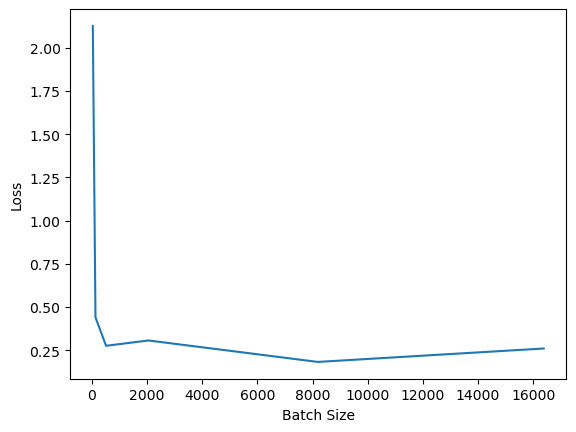

In [68]:
plt.plot(batch_size, np.asarray(loss))
plt.xlabel('Batch Size')
plt.ylabel('Loss')

### Question 3

##### 3.1 

Calculate the number of parameters in Alexnet. You will have to show calculations for each layer and
then sum it to obtain the total number of parameters in Alexnet. When calculating you will need to
account for all the filters (size, strides, padding) at each layer. Look at Sec. 3.5 and Figure 2 in Alexnet
paper (see reference). Points will only be given when explicit calculations are shown for each layer.

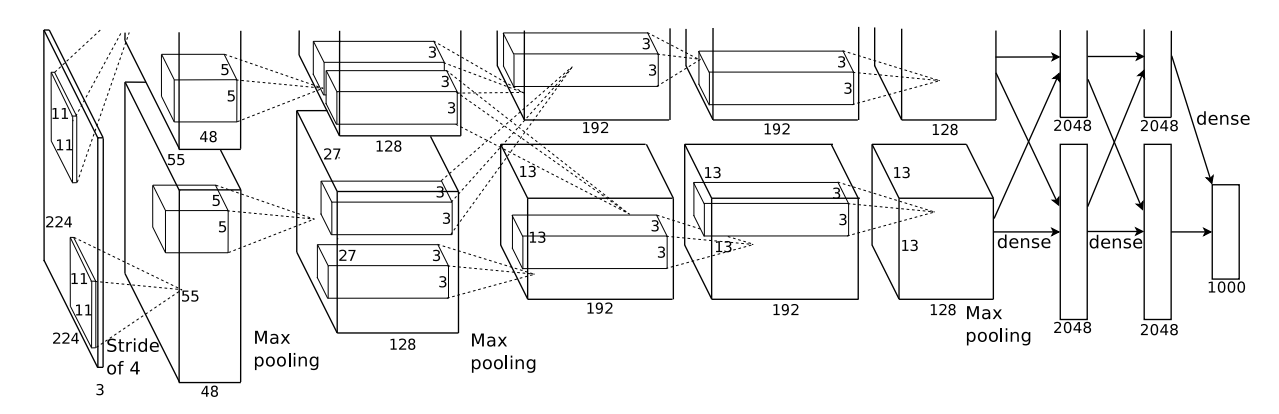

In [3]:
from IPython.display import Image
from IPython.display import Latex
Image(filename='031.PNG') 

##### 
To calculate the number of parameters in Alexnet I will do the math in 12 steps from left to right in the picture above.

##### Four main formulas:

(1) conv output = $\frac{input - kernels + 2*padding}{stride}+1$

(2) pooling output = $\frac{input - pool size}{stride}+1$

(3) conv weights = $ (\text{width of kernels})^{2}*channels*\text{number of kernels}$

(4) conv bias = Number of kernels

(5) Parameters = conv weights + conv bias

Eq. 0: given the input size 227x227x3

Eq.  1: given the Conv-1 (96 kernels of size 11×11×3, stride 4, padding 0), the Conv-1 output is $\frac{227-11}{4}+1=55$, the size then is 55×55×96, and the paramters is $11^{2}*3*96+96$=34944

Eq.  2: given the MaxPool-1 (size 3×3, stride 2), the output is $\frac{55-3}{2}+1=27$, the size then is 27×27×96

Eq.  3: given the Conv-2 (256 kernels of size 5×5×48, stride 1, padding 2), the Conv-2 output is $\frac{27-5+2*2}{1}+1=27$, the size then is 27×27×256, and the paramters is $5^{2}*96*256+256$=34,944

Eq.  4: given the MaxPool-2 (size 3×3, stride 2), the output is $\frac{27-3}{2}+1=13$, the size then is 13×13×256

Eq.  5: given the Conv-3 (384 kernels of size 3×3×256, stride 1, padding 1), the Conv-3 output is $\frac{13-3+1*2}{1}+1=13$, the size then is 13×13×384, and the paramters is $3^{2}*256*384+384$=885,120

Eq.  6: given the Conv-4 (384 kernels of size 3×3×192, stride 1, padding 1), the Conv-3 output is $\frac{13-3+1*2}{1}+1=13$, the size then is 13×13×384, and the paramters is $3^{2}*384*384+384$=1,327,488

Eq.  7: given the Conv-4 (256 kernels of size 3×3×192, stride 1, padding 1), the Conv-3 output is $\frac{13-3+1*2}{1}+1=13$, the size then is 13×13×256, and the paramters is $3^{2}*384*256+256$=884,992

Eq.  8: given the MaxPool-3 (size 3×3, stride 2), the output is $\frac{13-3}{2}+1=6$, the size then is 6×6×256

Eq.  9: Note from Eq. 8 we have given 9216(6×6×256) channels, then given the FC-1(4096×1),the paramters is $1^{2}*9216*4096+4096$=37,752,832, the size is 4096×1

Eq. 10: given the FC-2(4096×1),the paramters is $1^{2}*4096*4096+4096$=16,781,312, the size again is 4096×1

Eq. 11: given the FC-3(1000×1),the paramters is $1^{2}*4096*1000+1000$=4,097,000, the size again is 1000×1

Eq. 12:  output 1000×1. 

If we add up all the paratmers, we have a total of 62,378,344 paramters.

Also see my excel table below for a better big picture.


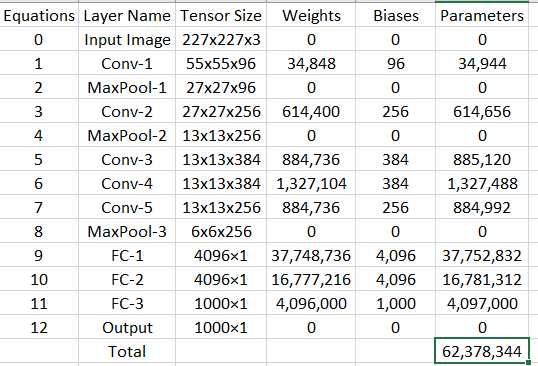

In [5]:
Image(filename='032.PNG') 

##### 3.2

All the nubmers are calculated using the same four formulas as in 3.1. Highlighed areas are filled.


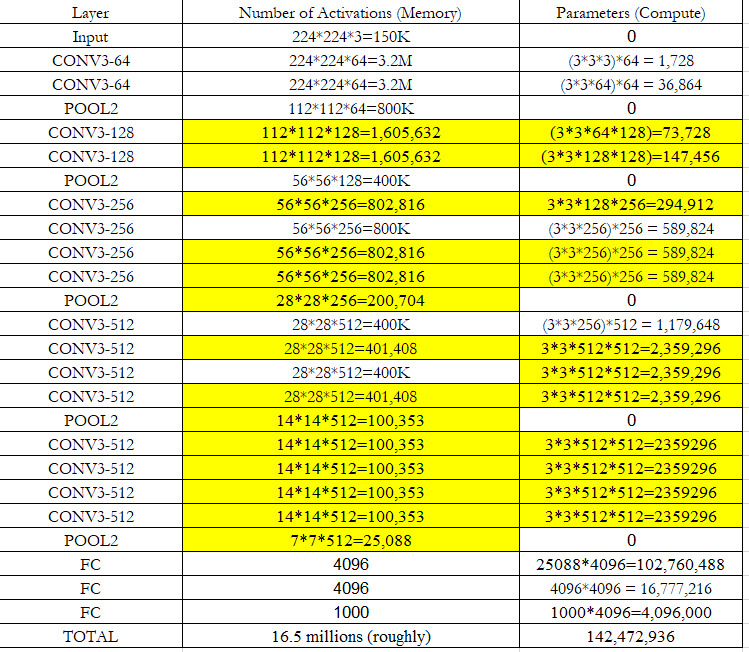

In [4]:
Image(filename='033.PNG') 

##### 3.3

All the nubmers are calculated using the same four formulas as in 3.1. Highlighed areas are filled.

######
reference: 
1.https://distill.pub/2019/computing-receptive-fields/

Following the notation of reference, let $r_{0}$ denote the total number of receptive field, let L denotes the total number of layers, $k_{l}$ denote the size of kernal at layer l, and $s_{l}$ denote the stride at layer l, then we have:
$$ r_{0} = \sum^{L}_{l=1}\bigg((k_{l}-1)\prod_{i=1}^{l-1}s_{i} \bigg)+1.$$

What remains to us is to show (1) N layers each with filter size F X F has the same size as (2)1 layer with filter size(NF-N+1)X(NF-N+1).

$$(1): r_{0}=N*(F-1)+1=NF-N+1$$
$$(2): r_{0}=1*(NF-N+1-1)+1=NF-N+1$$

Thus, there two have the same size of receptive field.

Lastly, for 3 filters of size 5x5, we have $r_{0}$=3*(5-1)+1=13.

#####  3.4

main reference:

1. https://valentinaalto.medium.com/understanding-the-inception-module-in-googlenet-2e1b7c406106#:~:text=The%20main%20idea%20of%20the,to%20face%20any%20trade%2Doff.



##### (a)

Inception module essentially reduces the dimensionality of feature maps by running a 1x1 convolutional filter to the input feature maps before passing them to the parallel operations, such that it leverages different filter sizes within its convolutional layers via a concatenation layer, where all the outputs and feature maps from the conv filters are combined into one object to create a single output of the Inception module.



#####  (b)

According to the Szegedy et al.(2014) paper, to concatenated all layers including the pooling as in Figure 1(a), the demensionality of max-pooling is the same as input using the same padding meaning the concatenated output size is
$$32*32*(128+192+96+256)=688,128$$
In contract, in Figure 1(b), using 1x1 convolutional filter inbetween, the concatenated output size becomes
$$32*32*(128+192+96+64)=491,520$$

#####  (c)

The total number of operations can be calculated by multiplying the number of outputs that are required to be provided with the number of filter multipliers needed to work out a single value within the output:

number of multiplier operations = (output dimensions) * (filter dimensions) * (depth of input channel).

Thus, the total number of convolutional operations in Figure 1(a):

$$(32 * 32 * 128)*(1 * 1)*(256)+(32*32*192)*(3 * 3)*(256)+(32*32*96)*(5 * 5)*(256)$$
$$=33,554,432+452,984,832+629,145,600=1,115,684,864.$$

The total number of convolutional operations in Figure 1(b):

$$(32*32*128)*(1 * 1)*(256)+((32*32*128)(1 * 1)(256)+(32*32*192)(3 * 3)*(128))+((32*32*32)(1 * 1）*(256)+(32*32*96)(5 * 5)(32))+(32*32*64)(1 * 1)(256)$$
$$=
33,554,432+260,046,848+87,031,808+16,777,216=397,410,304.$$


##### (d)

From (c), we can see that the total operations different between naive and using 1X1s is extreme large (1,115,684,864-397,410,304=718,274,560),meaning the computation benefits of using Inception Module is huge.

Specifically, this is accomplished by dimensionality
reduction using multiple 1x1 convolutional layers which creat outputs with a reduced nubmer of channels.

### Question 4


##### 
4.1 

Cutout is an image augmentation and regularization technique that randomly masks out square regions of input during training. and can be used to improve the robustness and overall performance of convolutional neural networks.

In [51]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import random
import numpy as np

##### 

The Source code of the function below: https://github.com/uoguelph-mlrg/Cutout/blob/master/util/cutout.py


In [52]:
class Cutout(object):
    """Randomly mask out one or more patches from an image.
    Args:
        n_holes (int): Number of patches to cut out of each image.
        length (int): The length (in pixels) of each square patch.
    """
    def __init__(self, n_holes, length):
        self.n_holes = n_holes
        self.length = length

    def __call__(self, img):
        """
        Args:
            img (Tensor): Tensor image of size (C, H, W).
        Returns:
            Tensor: Image with n_holes of dimension length x length cut out of it.
        """
        h, w, channels = img.shape

        for n in range(self.n_holes):
            
            y = np.random.randint(h)
            x = np.random.randint(w)

            y1 = np.clip(y - self.length // 2, 0, h)
            y2 = np.clip(y + self.length // 2, 0, h)
            x1 = np.clip(x - self.length // 2, 0, w)
            x2 = np.clip(x + self.length // 2, 0, w)

            img[y1: y2, x1: x2,:] = 0.
            
        return img
    
CUTOUT=Cutout(1,12)    

In [53]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

rn_1 = random.randint(0, 50000)
rn_2 = random.randint(0, 50000)


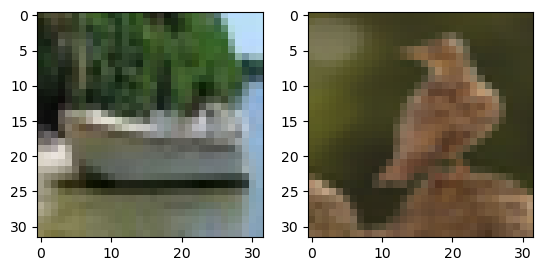

In [54]:
png_1 = X_train[rn_1]
png_2 = X_train[rn_2]

plt.subplot(1,2,1)
plt.imshow(png_1)
plt.subplot(1,2,2)
plt.imshow(png_2)

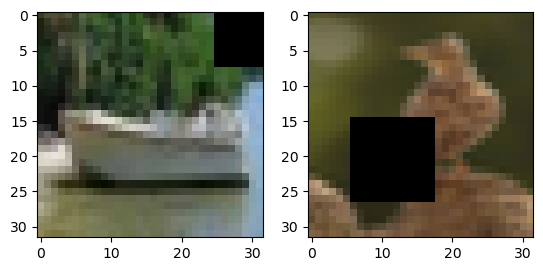

In [55]:
plt.subplot(1,2,1)
plt.imshow(CUTOUT(png_1))
plt.subplot(1,2,2)
plt.imshow(CUTOUT(png_2))

##### 
I picked 12x12 pixels because it fits well for the square-shaped fixed size zero-mask; whereas in Section 3.2 of DeVries et al paper, they selected a cutout size of 16x16 pixels based on Figure 3, the validation accuracy. 

##### 
4.2

The ResNet44 model I implemented below is based on the source code cited from the following github website. I also incorporated the cutoff regularization for the training sample discussed in 4.1 above.

Source code: 
1. https://github.com/PacktPublishing/Advanced-Deep-Learning-with-Keras/blob/master/chapter2-deep-networks/resnet-cifar10-2.2.1.py
2. https://keras.io/zh/examples/cifar10_resnet/


Main reference:

1.https://arxiv.org/abs/1512.03385


In [58]:
"""Trains a ResNet on the CIFAR10 dataset.
ResNet v1
[a] Deep Residual Learning for Image Recognition
https://arxiv.org/pdf/1512.03385.pdf
"""
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation
from tensorflow.keras.layers import AveragePooling2D, Input
from tensorflow.keras.layers import Flatten, add
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical
import numpy as np
import os
import math

# training parameters
batch_size = 64 
epochs = 100  #200 is what they used in the original paper but it cost too much time 
data_augmentation = False
num_classes = 10

# subtracting pixel mean improves accuracy
subtract_pixel_mean = True

# Model parameter
n = 7
version = 1
# ----------------------------------------------------------------------------
#           |      | 200-epoch | Orig Paper| 200-epoch | Orig Paper| sec/epoch
# Model     |  n   | ResNet v1 | ResNet v1 | ResNet v2 | ResNet v2 | GTX1080Ti
#           |v1| %Accuracy | %Accuracy | %Accuracy | %Accuracy | v1 (v2)
# ----------------------------------------------------------------------------
# ResNet44  | 7| 92.50     | 92.83     | NA        | NA        | 70 ( NA)
# ---------------------------------------------------------------------------

# computed depth from supplied model parameter n
if version == 1:
    depth = n * 6 + 2
elif version == 2:
    depth = n * 9 + 2

# model name, depth and version
model_type = 'ResNet%dv%d' % (depth, version)

# load the CIFAR10 data.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# input image dimensions.
input_shape = x_train.shape[1:]

# apply cutout regulization to training only
# Cutout(1,12)

for i in x_train:
    CUTOUT(i)

# normalize data.
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# if subtract pixel mean is enabled
if subtract_pixel_mean:
    x_train_mean = np.mean(x_train, axis=0)
    x_train -= x_train_mean
    x_test -= x_train_mean

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print('y_train shape:', y_train.shape)

# convert class vectors to binary class matrices.
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
y_train shape: (50000, 1)


Learning rate:  0.001
Model: "model_73349"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_16 (InputLayer)          [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_675 (Conv2D)            (None, 32, 32, 16)   448         ['input_16[0][0]']               
                                                                                                  
 batch_normalization_645 (Batch  (None, 32, 32, 16)  64          ['conv2d_675[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_645 (Activation)    (None, 32, 32, 16)   0           [

Text(0.5, 1.0, 'Epochs vs Validation Error')

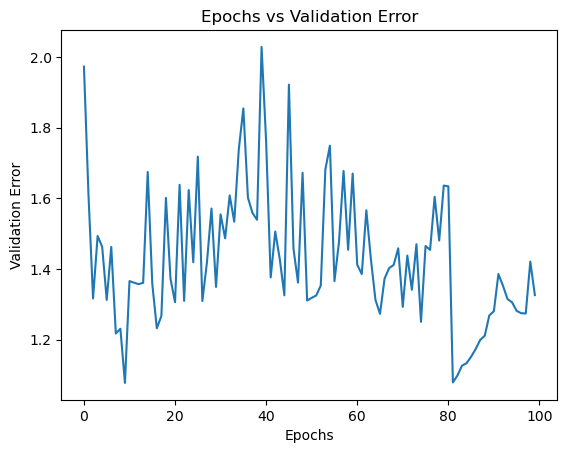

In [59]:
def lr_schedule(epoch):
    """Learning Rate Schedule
    Learning rate is scheduled to be reduced after 80, 120, 160, 180 epochs.
    Called automatically every epoch as part of callbacks during training.
    # Arguments
        epoch (int): The number of epochs
    # Returns
        lr (float32): learning rate
    """
    lr = 1e-3
    if epoch > 180:
        lr *= 0.5e-3
    elif epoch > 160:
        lr *= 1e-3
    elif epoch > 120:
        lr *= 1e-2
    elif epoch > 80:
        lr *= 1e-1
    print('Learning rate: ', lr)
    return lr


def resnet_layer(inputs,
                 num_filters=16,
                 kernel_size=3,
                 strides=1,
                 activation='relu',
                 batch_normalization=True,
                 conv_first=True):
    """2D Convolution-Batch Normalization-Activation stack builder
    Arguments:
        inputs (tensor): input tensor from input image or previous layer
        num_filters (int): Conv2D number of filters
        kernel_size (int): Conv2D square kernel dimensions
        strides (int): Conv2D square stride dimensions
        activation (string): activation name
        batch_normalization (bool): whether to include batch normalization
        conv_first (bool): conv-bn-activation (True) or
            bn-activation-conv (False)
    Returns:
        x (tensor): tensor as input to the next layer
    """
    conv = Conv2D(num_filters,
                  kernel_size=kernel_size,
                  strides=strides,
                  padding='same',
                  kernel_initializer='he_normal',
                  kernel_regularizer=l2(1e-4))

    x = inputs
    if conv_first:
        x = conv(x)
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
    else:
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
        x = conv(x)
    return x


def resnet_v1(input_shape, depth, num_classes=10):
    """ResNet Version 1 Model builder [a]
    Stacks of 2 x (3 x 3) Conv2D-BN-ReLU
    Last ReLU is after the shortcut connection.
    At the beginning of each stage, the feature map size is halved
    (downsampled) by a convolutional layer with strides=2, while 
    the number of filters is doubled. Within each stage, 
    the layers have the same number filters and the
    same number of filters.
    Features maps sizes:
    stage 0: 32x32, 16
    stage 1: 16x16, 32
    stage 2:  8x8,  64
    The Number of parameters is approx the same as Table 6 of [a]:
    ResNet20 0.27M
    ResNet32 0.46M
    ResNet44 0.66M
    ResNet56 0.85M
    ResNet110 1.7M
    Arguments:
        input_shape (tensor): shape of input image tensor
        depth (int): number of core convolutional layers
        num_classes (int): number of classes (CIFAR10 has 10)
    Returns:
        model (Model): Keras model instance
    """
    if (depth - 2) % 6 != 0:
        raise ValueError('depth should be 6n+2 (eg 20, 32, in [a])')
    # start model definition.
    num_filters = 16
    num_res_blocks = int((depth - 2) / 6)

    inputs = Input(shape=input_shape)
    x = resnet_layer(inputs=inputs)
    # instantiate the stack of residual units
    for stack in range(3):
        for res_block in range(num_res_blocks):
            strides = 1
            # first layer but not first stack
            if stack > 0 and res_block == 0:  
                strides = 2  # downsample
            y = resnet_layer(inputs=x,
                             num_filters=num_filters,
                             strides=strides)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters,
                             activation=None)
            # first layer but not first stack
            if stack > 0 and res_block == 0:
                # linear projection residual shortcut
                # connection to match changed dims
                x = resnet_layer(inputs=x,
                                 num_filters=num_filters,
                                 kernel_size=1,
                                 strides=strides,
                                 activation=None,
                                 batch_normalization=False)
            x = add([x, y])
            x = Activation('relu')(x)
        num_filters *= 2

    # add classifier on top.
    # v1 does not use BN after last shortcut connection-ReLU
    x = AveragePooling2D(pool_size=8)(x)
    y = Flatten()(x)
    outputs = Dense(num_classes,
                    activation='softmax',
                    kernel_initializer='he_normal')(y)

    # instantiate model.
    model = Model(inputs=inputs, outputs=outputs)
    return model

model = resnet_v1(input_shape=input_shape, depth=depth)

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=lr_schedule(0)),
              metrics=['acc'])
model.summary()

# enable this if pydot can be installed
# pip install pydot
#plot_model(model, to_file="%s.png" % model_type, show_shapes=True)
print(model_type)

# prepare model model saving directory.
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'cifar10_%s_model.{epoch:03d}.h5' % model_type
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)

# prepare callbacks for model saving and for learning rate adjustment.
checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_acc',
                             verbose=1,
                             save_best_only=True)

lr_scheduler = LearningRateScheduler(lr_schedule)

lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               min_lr=0.5e-6)

callbacks = [checkpoint, lr_reducer, lr_scheduler]

# run training, with or without data augmentation.
if not data_augmentation:
    print('Using Cutout Regulization as discussed in 4.1.')
    H =model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True,
              callbacks=callbacks)
else:
    print('Using real-time data augmentation.')
    # this will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        # set input mean to 0 over the dataset
        featurewise_center=False,
        # set each sample mean to 0
        samplewise_center=False,
        # divide inputs by std of dataset
        featurewise_std_normalization=False,
        # divide each input by its std
        samplewise_std_normalization=False,
        # apply ZCA whitening
        zca_whitening=False,
        # randomly rotate images in the range (deg 0 to 180)
        rotation_range=0,
        # randomly shift images horizontally
        width_shift_range=0.1,
        # randomly shift images vertically
        height_shift_range=0.1,
        # randomly flip images
        horizontal_flip=True,
        # randomly flip images
        vertical_flip=False)

    # compute quantities required for featurewise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    steps_per_epoch =  math.ceil(len(x_train) / batch_size)
    # fit the model on the batches generated by datagen.flow().
    model.fit(x=datagen.flow(x_train, y_train, batch_size=batch_size),
              verbose=1,
              epochs=epochs,
              validation_data=(x_test, y_test),
              steps_per_epoch=steps_per_epoch,
              callbacks=callbacks)

# score trained model
scores = model.evaluate(x_test,
                        y_test,
                        batch_size=batch_size,
                        verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

plt.plot(H.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Validation Error')
plt.title('Epochs vs Validation Error')

##### 4.3


Main reference for the formula and setup for Batch Augmentation with multiple M stances:

1.https://openaccess.thecvf.com/content_CVPR_2020/papers/Hoffer_Augment_Your_Batch_Improving_Generalization_Through_Instance_Repetition_CVPR_2020_paper.pdf


In [60]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation
from tensorflow.keras.layers import AveragePooling2D, Input
from tensorflow.keras.layers import Flatten, add
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical
import numpy as np
import os
import math
import time

class Cutout(object):
    """Randomly mask out one or more patches from an image.
    Args:
        n_holes (int): Number of patches to cut out of each image.
        length (int): The length (in pixels) of each square patch.
    """
    def __init__(self, n_holes, length):
        self.n_holes = n_holes
        self.length = length

    def __call__(self, img):
        """
        Args:
            img (Tensor): Tensor image of size (C, H, W).
        Returns:
            Tensor: Image with n_holes of dimension length x length cut out of it.
        """
        h, w, channels = img.shape

        for n in range(self.n_holes):
            
            y = np.random.randint(h)
            x = np.random.randint(w)

            y1 = np.clip(y - self.length // 2, 0, h)
            y2 = np.clip(y + self.length // 2, 0, h)
            x1 = np.clip(x - self.length // 2, 0, w)
            x2 = np.clip(x + self.length // 2, 0, w)

            img[y1: y2, x1: x2,:] = 0.
            
        return img

In [61]:
CUTOUT=Cutout(1,12)    
# training parameters
batch_size = 64 
epochs = 100
num_classes = 10
# subtracting pixel mean improves accuracy
subtract_pixel_mean = True

# Model parameter
n = 7
version = 1
# ----------------------------------------------------------------------------
#           |      | 200-epoch | Orig Paper| 200-epoch | Orig Paper| sec/epoch
# Model     |  n   | ResNet v1 | ResNet v1 | ResNet v2 | ResNet v2 | GTX1080Ti
#           |v1| %Accuracy | %Accuracy | %Accuracy | %Accuracy | v1 (v2)
# ----------------------------------------------------------------------------
# ResNet44  | 7| 92.50     | 92.83     | NA        | NA        | 70 ( NA)
# ---------------------------------------------------------------------------

# computed depth from supplied model parameter n
if version == 1:
    depth = n * 6 + 2
elif version == 2:
    depth = n * 9 + 2

# model name, depth and version
model_type = 'ResNet%dv%d' % (depth, version)

# load the CIFAR10 data.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# input image dimensions.
input_shape = x_train.shape[1:]

# normalize data.
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# if subtract pixel mean is enabled
if subtract_pixel_mean:
    x_train_mean = np.mean(x_train, axis=0)
    x_train -= x_train_mean
    x_test -= x_train_mean

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print('y_train shape:', y_train.shape)

# convert class vectors to binary class matrices.
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
y_train shape: (50000, 1)


In [62]:
lr_scheduler = LearningRateScheduler(lr_schedule)

lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               min_lr=0.5e-6)

callbacks = [lr_reducer, lr_scheduler]

M = [2,4,8,16]
dict_M={}

for m in M:
    x_train_ = np.repeat(x_train, repeats=m, axis=0)
    y_train_ = np.repeat(y_train, repeats=m, axis=0)
    for i in range(x_train_dup.shape[0]):
        x_train_dup[i] = CUTOUT.__call__(x_train_dup[i]) #Using cutout regulization only    
       
    model = resnet_v1(input_shape=input_shape, depth=depth)
    model.compile(loss='categorical_crossentropy',
                    optimizer=Adam(lr=.1),
                    metrics=['accuracy'])
    
    tic = time.time()
    H_1= model.fit(x_train_dup, y_train_dup,
              batch_size=batch_size*m,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True,
              callbacks=callbacks)
    toc = time.time()
    Test_Accuracy=
    dict_M[m]=[H_1.history["val_loss"],[1 - a for a in H_1.history["val_accuracy"]],toc-tic]

Learning rate:  0.001
Epoch 1/100
782/782 [==============================] - 56s 64ms/step - loss: 2.1924 - accuracy: 0.3186 - val_loss: 2.0846 - val_accuracy: 0.3876 - lr: 0.0010
Learning rate:  0.001
Epoch 2/100
782/782 [==============================] - 49s 62ms/step - loss: 1.9094 - accuracy: 0.4010 - val_loss: 1.9396 - val_accuracy: 0.4301 - lr: 0.0010
Learning rate:  0.001
Epoch 3/100
782/782 [==============================] - 49s 62ms/step - loss: 1.7655 - accuracy: 0.4414 - val_loss: 1.7067 - val_accuracy: 0.4787 - lr: 0.0010
Learning rate:  0.001
Epoch 4/100
782/782 [==============================] - 49s 62ms/step - loss: 1.6642 - accuracy: 0.4719 - val_loss: 2.2571 - val_accuracy: 0.4738 - lr: 0.0010
Learning rate:  0.001
Epoch 5/100
782/782 [==============================] - 49s 62ms/step - loss: 1.5962 - accuracy: 0.4928 - val_loss: 1.6136 - val_accuracy: 0.5434 - lr: 0.0010
Learning rate:  0.001
Epoch 6/100
782/782 [==============================] - 49s 62ms/step - loss: 1

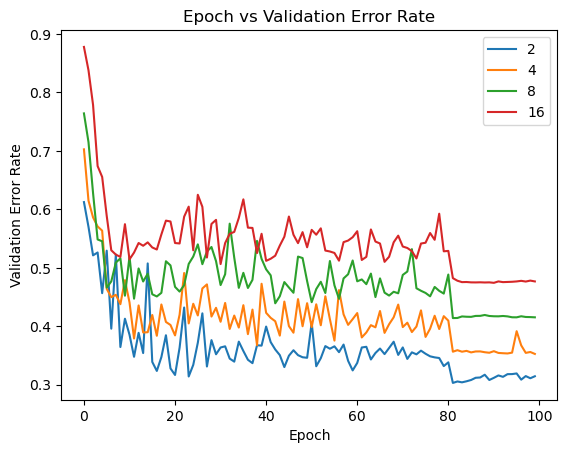

m = 2 time: 4886.096051454544
m = 4 time: 4934.808514118195
m = 8 time: 4479.884058237076
m = 16 time: 4626.048010587692


In [69]:
fig = plt.figure()
for k, v in dict_M.items():
    plt.plot(v[1],label=k)

plt.title('Epoch vs Validation Error Rate')
plt.ylabel('Validation Error Rate')
plt.xlabel('Epoch')
plt.legend()
plt.show()

for k, v in dict_M.items():
    print("m =",k ,"time:", v[2])